<a href="https://colab.research.google.com/github/HAN-GEONHUI/test/blob/t_academy_%EC%88%98%EC%97%85_pandas/17_pandas_m%26a(240902).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 기본적으로 1개의 DF에 대해서 아니라
# 여러개의 DF에 흩어진 정보들을 모을려고 하는 것!
# ==>  sql의 join같은 것을 생각하면 됨!

In [ ]:
# 방식1) 단순하게 DF을 이어서 붙이는 방식!!!!
#        ==>옆으로 단순히 이어 붙이기
#           아래로 단순히 이어 붙이기
#        -->qppend(아래로 붙이는 메서트):concat 통합
#           concat(asix=0/1)
#        -->concat([합칠 대상1,합칠 대상2,,,],)
#                   axis=0/1,
#                   ignore_index=T/F)
#                   : 참고) 합치다 보면 인덱스가 중첩/순서가 꼬일수 있다.
#                           기존 인덱스 무시하고,정수0~N까지

#방식2)특정 조건에 맞춰서 연결(sql join)

In [2]:
import pandas as pd

In [3]:
#--> 샘플데이터 하나 만들어서 처리
df1 = pd.DataFrame(
    {
        "A" : ["A0","A1","A2","A3"],
        "B" : ["B0","B1","B2","B3"],
        "C" : ["C0","C1","C2","C3"],
        "D" : ["D0","D1","D2","D3"]
    },
   index = [0,1,2,3]
)
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [4]:
df2 = pd.DataFrame(
    {
        "A" : ["A4","A5","A6","A7"],
        "B" : ["B4","B5","B6","B7"],
        "C" : ["C4","C5","C6","C7"],
        "D" : ["D4","D5","D6","D7"]
    },
   index = [4,5,6,7]
)
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [ ]:
#상황: 2개의 서로 다른 df이 존재!
#-가로줄에 대한 인덱스는 서로 df가 다름,세로줄에 대한 인덱스(컬럼명)가 서로 동일함.
# ==> 각 부서별로/지점별로 양식 파일 만들어서 엑셀 파일 배포
#     각 부서별로 요청 파일을 작성해서 받아서 내가 처리하겠다->취합을 하려고 한다!!!

In [5]:
pd.concat( [df1, df2])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [7]:
pd.concat( [df1, df2],axis=0)
#FM: 합칠 방향에 대해서 가로 인덱스 axis=0:default

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [8]:
pd.concat( [df1, df2],axis=1)
#--> 옆으로 속성이 늘어나는 경우에 대해서!!
#주의사항!!) 옆으로 컬럼을 axis로 강제를 했기에
#df1의 컬럼수 +df2의 컬럼 수: 전체 컬럼으로++ 가로줄에 인덱스를 통일하지 않으면 이상하게 합쳐짐!

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7


In [ ]:
# *** 중요!!!) 데이터를 합치는 과정에서 pd.concat을 활용할 떄.
#    ==> 가로줄에 대한 인덱스가 공통적인 사항인지 아닌지 체크!
#    ==> 세로줄에 대한 컬럼명도 공통적인 사항인지 아닌지 체크!
# ==> DF으로 합칠 떄에는 컬럼/가로 인덱스 체크&정리!!
# df.rename( columns= {~~~:~~~~})
# df.rename( index ={~~~:~~~})

In [9]:
#-->점/선 그래프의 코드화:dict를 활용하는 방식과 유사
df1 = pd.DataFrame(
    {
        "A" : ["A0","A1","A2","A3"],
        "B" : ["B0","B1","B2","B3"],
        "C" : ["C0","C1","C2","C3"],
        "D" : ["D0","D1","D2","D3"],
    },
    index = [0,1,2,3]
)

#
df2 = pd.DataFrame(
    {
        "A" : ["A4","A5","A6","A7"],
        "B" :  ["B4","B5","B6","B7"],
        "CC" : ["C4","C5","C6","C7"], #
        "DD" : ["D4","D5","D6","D7"], #
     },
    #
    index = [2,3,5,6]
)

In [10]:
pd.concat( [df1, df2],axis=0)
#--> 기본적으로 아래로 합치기

,A,B,C,D,CC,DD
0,A0,B0,C0,D0,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN
2,A4,B4,NaN,NaN,C4,D4
3,A5,B5,NaN,NaN,C5,D5
5,A6,B6,NaN,NaN,C6,D6
6,A7,B7,NaN,NaN,C7,D7


In [11]:
t=pd.concat( [df1, df2],axis=0)
t

,A,B,C,D,CC,DD
0,A0,B0,C0,D0,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN
2,A4,B4,NaN,NaN,C4,D4
3,A5,B5,NaN,NaN,C5,D5
5,A6,B6,NaN,NaN,C6,D6
6,A7,B7,NaN,NaN,C7,D7


In [12]:
t.loc[2,:]

,A,B,C,D,CC,DD
2,A2,B2,C2,D2,NaN,NaN
2,A4,B4,NaN,NaN,C4,D4


In [13]:
t.loc[1,:]

,1
A,A1
B,B1
C,C1
D,D1
CC,NaN
DD,NaN


In [14]:
pd.concat( [df1, df2],axis=0,ignore_index=True)
#--> 기존 인덱스 무시하고,그냥 정수인덱스로 풀어버림!


,A,B,C,D,CC,DD
0,A0,B0,C0,D0,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN
4,A4,B4,NaN,NaN,C4,D4
5,A5,B5,NaN,NaN,C5,D5
6,A6,B6,NaN,NaN,C6,D6
7,A7,B7,NaN,NaN,C7,D7


In [15]:
pd.concat([ df1, df2], axis=1)

,A,B,C,D,A,B,CC,DD
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,A4,B4,C4,D4
3,A3,B3,C3,D3,A5,B5,C5,D5
5,NaN,NaN,NaN,NaN,A6,B6,C6,D6
6,NaN,NaN,NaN,NaN,A7,B7,C7,D7


In [16]:
pd.concat([ df1, df2], axis=1,ignore_index=True)

,0,1,2,3,4,5,6,7
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,A4,B4,C4,D4
3,A3,B3,C3,D3,A5,B5,C5,D5
5,NaN,NaN,NaN,NaN,A6,B6,C6,D6
6,NaN,NaN,NaN,NaN,A7,B7,C7,D7


In [ ]:
#정리)pandas로 concat을 할 때
#체크사항: 컬럼명,가로줄 인덱스 이름 체크
#axis를 지정한 방향: 무조건 그냥 겹쳐도 그냥 나열
#axis를 지정하지 않은 반대 방향: or처리로 겹치면 겹친쪽에, 새로운 것이면 새롭게 생성
#--> 빈 공백이 NAN이 많이 생성될 수 있음!

In [17]:
pd.concat([ df1, df2], axis=1)

,A,B,C,D,A,B,CC,DD
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,A4,B4,C4,D4
3,A3,B3,C3,D3,A5,B5,C5,D5
5,NaN,NaN,NaN,NaN,A6,B6,C6,D6
6,NaN,NaN,NaN,NaN,A7,B7,C7,D7


In [18]:
#참고) 옆으로 합친 df중에서 ,df2를 중심으로 보겠다!
pd.concat([df1,df2],axis=1).reindex(df2.index)
#-->left join 틱하게!

,A,B,C,D,A,B,CC,DD
2,A2,B2,C2,D2,A4,B4,C4,D4
3,A3,B3,C3,D3,A5,B5,C5,D5
5,NaN,NaN,NaN,NaN,A6,B6,C6,D6
6,NaN,NaN,NaN,NaN,A7,B7,C7,D7


In [ ]:
# 방법2) 단순히 합치는 것이 아니라 concat X
#      ==> sql의 join을 하는 것 처럼 특정 조건을 걸어서 매칭!!
#          sql : join
#          pandas : merge
# 참고) pandas에서도 기존 sql 많이 사용하니,sql을 적용할 수 있는 기능을 구현 함.
# 붙일 기준을 가지고 데이터를 합침:FK을 누가하나

In [19]:
baseball_player = pd.DataFrame(
    {
        "player_name" :["류현진", "추신수","김광현", "최정","이대호"],
        "team_no" : [1993,2001,2001,2010, None]
    }
)
baseball_player

,player_name,team_no
0,류현진,1993.0
1,추신수,2001.0
2,김광현,2001.0
3,최정,2010.0
4,이대호,NaN


In [21]:
baseball_team = pd.DataFrame(
    {
        "team_name":["한화","태평양","SSG", "넥센"],
        "team_home":["대전","서울","인천","고척"],
        "team_id"  :[1993, 1999,2001,2010]
    }
)
baseball_team

,team_name,team_home,team_id
0,한화,대전,1993
1,태평양,서울,1999
2,SSG,인천,2001
3,넥센,고척,2010


In [ ]:
#SQL:left join(L/R table)
select * from L left join R on L.id = R.ids;
#pandas:DF을 기준으로: 세로 컬령명, 가로인덱스
pd.merge( L-DF, R-DF, how="어떻게",
         left_on = L-DF의 기준 컬럼명/들,
          right_on = R-DF의 기준 컬럼명/들
         )
# + on : L-DF, R_DF의 기준 컬럼명이 동일할 때..
# + 기준이 index에 있다면,,
#   left_index , right_index : T/F

In [ ]:
#EX1)선수 정보 df을 중심으로 팀의 정보가 있으면 가지고 오자!, 없으면 말고
#      선수DF : left
#      팀 df  : right
# sql) select * from plyer P left join team T
#                on P.team_no = T.team_id;

In [22]:
baseball_player

,player_name,team_no
0,류현진,1993.0
1,추신수,2001.0
2,김광현,2001.0
3,최정,2010.0
4,이대호,NaN


In [23]:
# DF관점으로
# baseball_player DF : 기준 "컬럼"-->team_no
# baseball_team   DF:  기준 "컬럼"-->team_id
# ==> 기준이 여러 컬럼일 수 있음 : [기준 순서대로 나열,,,,,,,]
pd.merge(baseball_player,  baseball_team,
         how="left",
         left_on = "team_no",
         right_on="team_id"
         )
# ==> left/right join에서 주의사항!!!
#     기준 매칭에 대해서 1:1 , 1:n, n:m  매칭이냐에 따랐고 합쳐진 데이터의 수가 다를 수 있음!!!!

,player_name,team_no,team_name,team_home,team_id
0,류현진,1993.0,한화,대전,1993.0
1,추신수,2001.0,SSG,인천,2001.0
2,김광현,2001.0,SSG,인천,2001.0
3,최정,2010.0,넥센,고척,2010.0
4,이대호,NaN,NaN,NaN,NaN


In [ ]:
## Ex2) 팀DF을 중심으로, 선수에 대한 정보들을 수집하려고 함.
#      팀DF : 오른쪽, 선수DF :왼쪽
#      기준 :컬럼 or index
# sql) select * from player P right join team T
#                P.team_no = T.team_id;

In [25]:
import pandas as pd

In [26]:
pd.merge(baseball_player,baseball_team,
         how="right",
         left_on="team_no",right_on="team_id")
#-->team df는 원래 데이터가 4개
#   team을 중심으로 선수 데이터를 가지고 오니 5개로 증가!
# ---> 팀  df: 선수 df = 1: n
#      기준이 되는 팀의 df보다 늘어날 수 있음!

,player_name,team_no,team_name,team_home,team_id
0,류현진,1993.0,한화,대전,1993
1,NaN,NaN,태평양,서울,1999
2,추신수,2001.0,SSG,인천,2001
3,김광현,2001.0,SSG,인천,2001
4,최정,2010.0,넥센,고척,2010


In [ ]:
# 참고) 양족 L-DF, R-DF의 기준 컬럼명이 동일하다면,,
pd.merge( baseball_player, baseball_team,
         how="~~",on="기준공통컬럼명")

In [ ]:
# Ex3) 지금 현역으로 뛰고 있는 선수들의 정보하고,
#      그 선수들의 소속 팀에 대한 정보를 알고 싶다!
# ==> 선수 정보도 있고 & 팀에 대한 정보도 있어야 함!
# sql : inner join

In [27]:
pd.merge( baseball_player, baseball_team,
         how="inner",
          left_on="team_no", right_on="team_id")

,player_name,team_no,team_name,team_home,team_id
0,류현진,1993.0,한화,대전,1993
1,추신수,2001.0,SSG,인천,2001
2,김광현,2001.0,SSG,인천,2001
3,최정,2010.0,넥센,고척,2010


In [ ]:
#Ex4)Exclusive join:sql에서도 딱히 쿼리문을 만든 것이 아니라 조건검색 where~is null~~
#--> **누락된 데이터가 있는지 없는지 체크,사람의 실수로 누락이 된건지 체크
#--> 진짜 방출/은퇴해서 소속팀의 정보가 없는지 아니면 데이터가 작성하다가 실수로 누락이 되어서 없는지 알아봐야 함.
#->선수 L,선수R

In [28]:
temp = pd.merge(baseball_player,  baseball_team,
         how="left",
         left_on = "team_no",
         right_on="team_id"
         )
temp

,player_name,team_no,team_name,team_home,team_id
0,류현진,1993.0,한화,대전,1993.0
1,추신수,2001.0,SSG,인천,2001.0
2,김광현,2001.0,SSG,인천,2001.0
3,최정,2010.0,넥센,고척,2010.0
4,이대호,NaN,NaN,NaN,NaN


In [30]:
#sql) select * from P left join T
#                on P.team_no = T.team_id
#                where T.team_id is null;
# ==> sql의 where 조건 필터링 : 불리언 인덱싱!!!
temp[temp.loc[:, "team_id"].isnull()]

,player_name,team_no,team_name,team_home,team_id
4,이대호,NaN,NaN,NaN,NaN


In [ ]:
# Ex) 선수에 정보가 없는 팀에 대한 사항이나
#     소속팀에 대한 정보가 없는 선수이거나,,
# ==> 뭐라도 하나의 정보가 누락된 데이터를 체크!!!
# step1) 일단 다 합치자 : full join --> how : outer
# step2) 양쪽에서 누락 체크

In [31]:
temp = pd.merge(baseball_player,  baseball_team,
         how="outer",
         left_on = "team_no",
         right_on="team_id"
         )
temp

,player_name,team_no,team_name,team_home,team_id
0,류현진,1993.0,한화,대전,1993.0
1,추신수,2001.0,SSG,인천,2001.0
2,김광현,2001.0,SSG,인천,2001.0
3,최정,2010.0,넥센,고척,2010.0
4,이대호,NaN,NaN,NaN,NaN
5,NaN,NaN,태평양,서울,1999.0


In [32]:
(temp["team_id"].isnull()) | ( temp["team_no"].isnull())

,0
0,False
1,False
2,False
3,False
4,True
5,True


In [33]:
temp[(temp["team_id"].isnull()) | ( temp["team_no"].isnull())]

,player_name,team_no,team_name,team_home,team_id
4,이대호,NaN,NaN,NaN,NaN
5,NaN,NaN,태평양,서울,1999.0


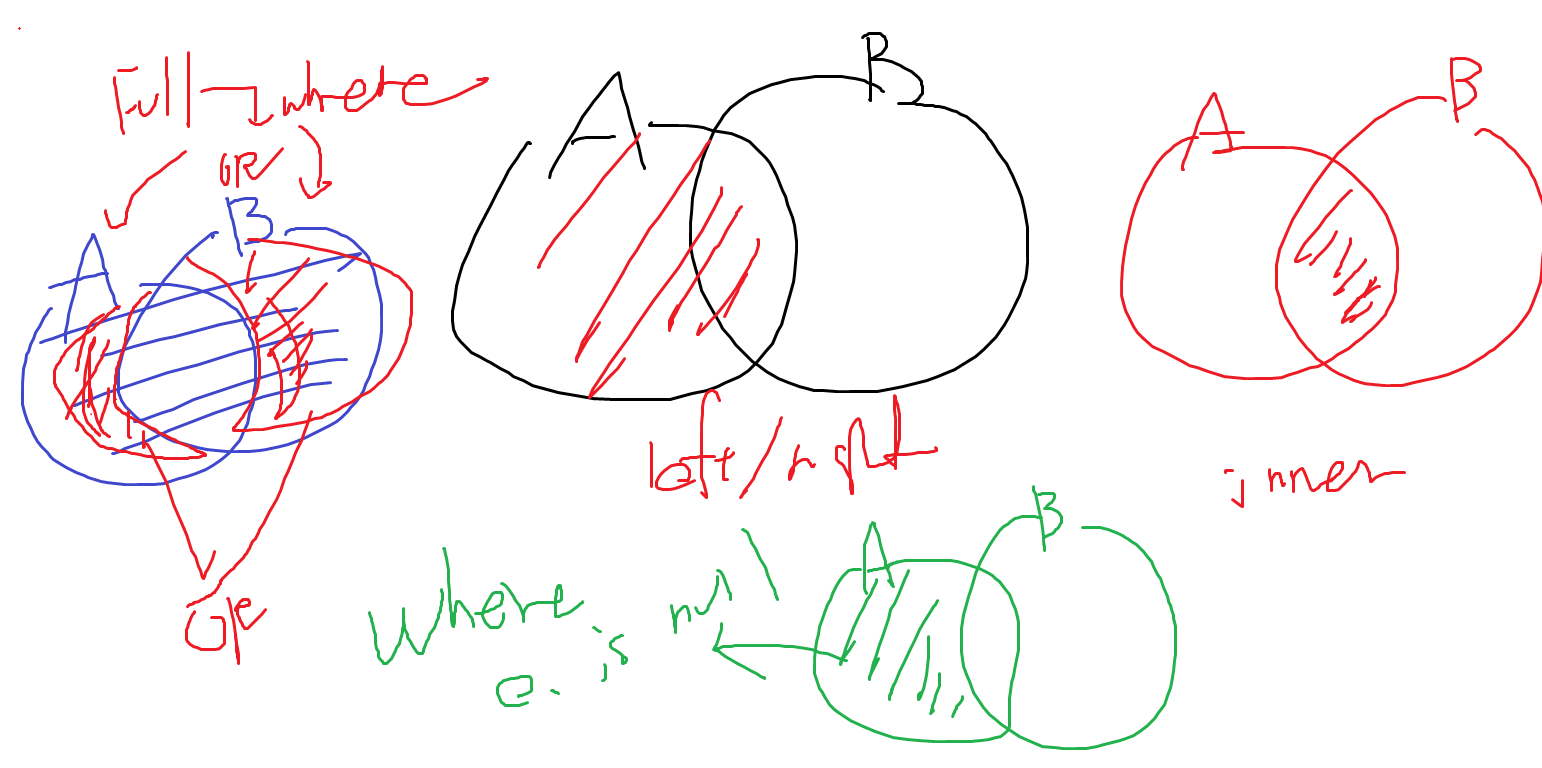

In [ ]:
# 중요!!!!
# 기준을 가지고 데이터를 합칠 떄 : join
# -> 합쳐진 결과에 대해서 데이터의 수 꼭! 체크!!!!!( key 중심)
# -> 누락된 데이터가 있는지 : 진짜 없는 정보인지, 실수인지 체크!
# ==> 언어들은 시키는 대로 수행할 뿐 분석자가 주관/주도해서 모든 것들을 체크하고 파악을 해야 함!

In [ ]:
# 참고) 결합하려는 DF의 기준이 되는 것이 1개 컬럼이름
#                                        1개 가로인덱스
# ==> kobis api를 가지고 했을 때, movie_cd를 인덱스!!

In [37]:
baseball_player = pd.DataFrame(
    {
        "player_name" :["류현진", "추신수","김광현", "최정","이대호"],
        "team_no" : [1993,2001,2001,2010, None]
    },
    index = ["p_01","p_02","p_03","p_04","p_05"]
)
baseball_player.index.name = "player_id"
baseball_player

,player_name,team_no
player_id,,
p_01,류현진,1993.0
p_02,추신수,2001.0
p_03,김광현,2001.0
p_04,최정,2010.0
p_05,이대호,NaN


In [38]:
baseball_team = pd.DataFrame(
    {
        "team_name":["한화","태평양","SSG", "넥센"],
        "team_home":["대전","서울","인천","고척"]
    },
    index = [1993, 1999,2001,2010]
)
baseball_team

,team_name,team_home
1993,한화,대전
1999,태평양,서울
2001,SSG,인천
2010,넥센,고척


In [ ]:
#EX)선수L,팀R
#-->선수 데이터를 기준으로 팀의 정보가 있으면 추가하겠다!
# 결합기준 : 선수 DF--> 컬럼:left_on = team_no
#             팀 DF --> 가로 인덱스:right_index=T

In [39]:
pd.merge( baseball_player, baseball_team,
         how="left",
          left_on="team_no",
          right_index=True)

,player_name,team_no,team_name,team_home
player_id,,,,
p_01,류현진,1993.0,한화,대전
p_02,추신수,2001.0,SSG,인천
p_03,김광현,2001.0,SSG,인천
p_04,최정,2010.0,넥센,고척
p_05,이대호,NaN,NaN,NaN


In [45]:
# Ex) 팀 정보를 기준으로 선수의 정보가 있으면 가져다 붙여주세요.
#    -> 선수 :L, 팀:R
pd.merge(baseball_player, baseball_team,
         how="right",
         left_on="team_no",
         right_index=True)

,player_name,team_no,team_name,team_home
p_01,류현진,1993.0,한화,대전
NaN,NaN,1999.0,태평양,서울
p_02,추신수,2001.0,SSG,인천
p_03,김광현,2001.0,SSG,인천
p_04,최정,2010.0,넥센,고척


In [44]:
pd.merge(baseball_player,baseball_team,
    how="right",
    left_on="team_no",
    right_index=True).reset_index()

,index,player_name,team_no,team_name,team_home
0,p_01,류현진,1993.0,한화,대전
1,NaN,NaN,1999.0,태평양,서울
2,p_02,추신수,2001.0,SSG,인천
3,p_03,김광현,2001.0,SSG,인천
4,p_04,최정,2010.0,넥센,고척


In [ ]:
#정리!)
#merge/join을 통해서 특정 기준을 가지고 합칠 때!
#--> 양쪽에 기준이 컬럼에(~on),가로 인덱스(~~index=T/F)
#    :기준의 위치가 컬럼 or 인덱스!
#--> 기준에 대한 매칭1:1,1:n,n:m 따른 데이터의 수 체크
# ==> 기존의 가로줄 index 꼬일 수 있고, 누락이 될 수 있음!
#     다시 인덱스를 정리하는 과정이 필요함!!
#     :reset_index, set_index etc~~~
# *** 빠져있는 exclusive쪽에서 실제 누락인지, 진짜 없는 정보인지 체크!